DAILY COUNT OF AGGREGATED TOPIC KEYWORDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_daily_count = pd.read_csv('F:/WB/Issue Monitoring/data/daily_keyword_count.csv')
df_daily_count = df_daily_count[~df_daily_count['date'].isin(['2020-04-12','2020-04-13','2020-04-14','2020-04-15'])].reset_index(drop=True)

In [3]:
df_daily_count['date'].unique()

array(['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
       '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
       '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
       '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
       '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
       '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
       '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
       '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
       '2020-05-26', '2020-05-27', '2020-05-28', '2020-

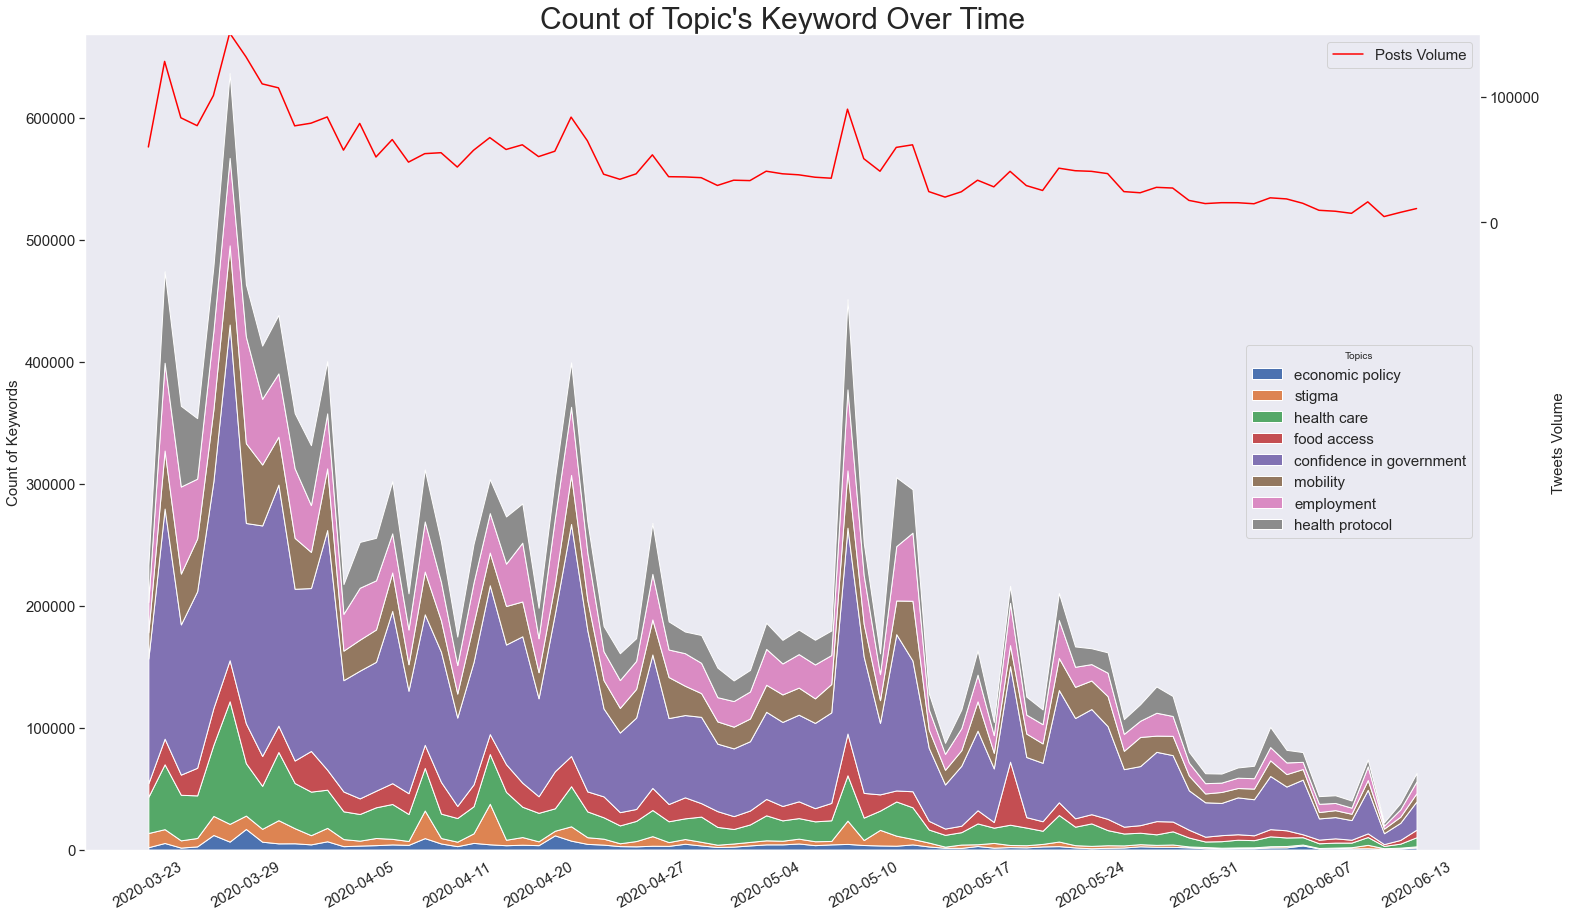

In [8]:
legend = []
yy = []
for topic in list(df_daily_count['topic'].unique()):
    df_temp = df_daily_count[df_daily_count.topic==topic]
    # df_temp = df_temp[df_temp.week_of_the_year>=6].reset_index(drop=True)
    # df_temp['week_of_the_year'] = df_temp['week_of_the_year'].replace({6:'Feb 2nd Week',7:'Feb 3rd Week',8:'Feb 4th Week',9:'Feb 5th Week / Mar 1st Week',10:'Mar 2nd Week',11:'Mar 3rd Week',12:'Mar 4th Week',13:'Mar 5th Week',14:'Mar 6th Week / Apr 1st Week',15:'Apr 2nd Week',16:'Apr 3rd Week'})
    legend.append(topic)
    yy.append(df_temp['count'].to_list())

x = df_temp['date'].to_list()
y = np.vstack(yy)
fig, ax1 = plt.subplots(figsize=(25,15))
plt.title("Count of Topic's Keyword Over Time",fontsize=30)
ax1.stackplot(x, y, labels=legend)

ax2 = ax1.twinx()
ax2.plot(x,df_daily_count[df_daily_count.topic=='economic policy']['tweets_volume'].to_list(),color='red')

ax1.grid()
ax2.grid(False)
ax1.set_ylabel('Count of Keywords',fontsize=15)
ax1.tick_params(axis='x', rotation=30,labelsize=15)
ax1.tick_params(axis='y',labelsize=15)
ax1.legend(legend,loc='center right',title="Topics",fancybox=True,fontsize=15)
xticks = ax1.xaxis.get_major_ticks()
remove_date = [i for i in range(len(df_daily_count['date'].unique())) if i not in [0,6,13,19,24,31,38,44,51,58,65,72,78]]
for i in remove_date:
    xticks[i].set_visible(False)
ax2.set_ylabel('Tweets Volume',fontsize=15)
ax2.set_ylim([-500000,150000])
ax2.tick_params(axis='y',labelsize=15)
yticks = ax2.yaxis.get_major_ticks()
yticks[0].set_visible(False)
yticks[1].set_visible(False)
yticks[2].set_visible(False)
yticks[3].set_visible(False)
yticks[4].set_visible(False)
ax2.legend(['Posts Volume'],loc='upper right',fontsize=15)
plt.xlabel('Date')
plt.show()
fig.savefig('chart_output/daily_keyword_count.png', dpi=fig.dpi)